Benchmarking 16 x 512x512 matrices...
Benchmarking 16 x 1024x1024 matrices...
Benchmarking 16 x 2048x2048 matrices...
Benchmarking 16 x 3072x3072 matrices...
Benchmarking 16 x 4096x4096 matrices...

Summary (average time in seconds):
16x512x512 | CPU: 0.0062s | MPS: 0.0046s
16x1024x1024 | CPU: 0.0389s | MPS: 0.0183s
16x2048x2048 | CPU: 0.4181s | MPS: 0.1679s
16x3072x3072 | CPU: 1.2718s | MPS: 0.5592s
16x4096x4096 | CPU: 3.2225s | MPS: 1.3376s


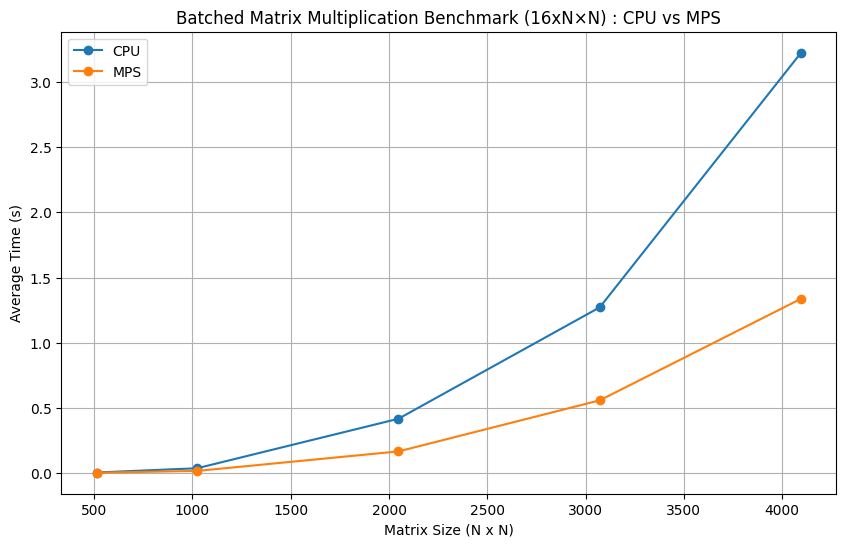

In [1]:
import torch
import time
import matplotlib.pyplot as plt

# Check for MPS availability
device_cpu = torch.device("cpu")
device_mps = torch.device("mps") if torch.backends.mps.is_available() else None

if not device_mps:
    print("MPS not available on this system.")
    exit()

# Function to benchmark batched matmul on a given device
def benchmark_bmm(batch_size, matrix_size, device, runs=5):
    a = torch.randn(batch_size, matrix_size, matrix_size, device=device)
    b = torch.randn(batch_size, matrix_size, matrix_size, device=device)

    # Warm-up run
    _ = torch.bmm(a, b)
    if device.type == 'mps':
        torch.mps.synchronize()

    times = []
    for _ in range(runs):
        start = time.time()
        _ = torch.bmm(a, b)
        if device.type == 'mps':
            torch.mps.synchronize()
        elapsed = time.time() - start
        times.append(elapsed)
    return sum(times) / runs

# Sizes and batch sizes to test
matrix_sizes = [512, 1024, 2048, 3072, 4096]
batch_size = 16  # Fixed batch size

cpu_times = []
mps_times = []

for size in matrix_sizes:
    print(f"Benchmarking {batch_size} x {size}x{size} matrices...")
    cpu_time = benchmark_bmm(batch_size, size, device_cpu)
    mps_time = benchmark_bmm(batch_size, size, device_mps)
    cpu_times.append(cpu_time)
    mps_times.append(mps_time)

# Print summary table
print("\nSummary (average time in seconds):")
for size, ct, mt in zip(matrix_sizes, cpu_times, mps_times):
    print(f"{batch_size}x{size}x{size} | CPU: {ct:.4f}s | MPS: {mt:.4f}s")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, cpu_times, label="CPU", marker='o')
plt.plot(matrix_sizes, mps_times, label="MPS", marker='o')
plt.xlabel("Matrix Size (N x N)")
plt.ylabel("Average Time (s)")
plt.title(f"Batched Matrix Multiplication Benchmark ({batch_size}xN×N) : CPU vs MPS")
plt.legend()
plt.grid(True)
plt.show()
